<img src="https://datascientest.fr/train/assets/logo_datascientest.png" style="height:150px">

<hr style="border-width:2px;border-color:#75DFC1">
<center><h1>Les images en DeepLearning</h1></center>
<center><h2>Exploration de données</h2></center>
<hr style="border-width:2px;border-color:#75DFC1">

## Introduction
> En programation, les images sont des objets courrament utilisés et plus particulierement en Deep Learning.
>
>En python, une image est interpretée comme un numpy array reprenant l'ensemble des pixels de votre image dans un tableau à trois dimensions : 
* Une première pour le nombre de pixels en **`largeur`**
* Une deuxième pour le nombre de pixels en **`hauteur`**
* Enfin une troisème qui correspond aux différents plan de l'image selon les niveaux de couleurs primaires, à savoir les pixels rouge,vert et bleu respectivement.
>
<img src='RVB.png' style="height:250px">

## Lire, redimensionner et afficher une image 
>
>L'étape la plus importante avant de commencer est forcément de lire le ou les images qui nous servirons lors de notre analyse.
>
>Il est également possible que nous ayons besoin de redimensionner une ou plusieurs images pour que note algorithme fonctionne correctement.
>
>Pour effectuer ces opérations, nous allons utiliser la bibliothèque OpenCV que propose Python.

## Compétences requises

> * Scikit-learn
> * Matplotlib

- Exécutez la cellule ci-dessous pour importer les modules nécessaires à l'exercice.

In [1]:
%matplotlib inline
import numpy as np # Pour la manipulation de tableaux

import matplotlib.pyplot as plt # Pour l'affichage d'images
from matplotlib import cm # Pour importer de nouvelles cartes de couleur

from sklearn.model_selection import train_test_split # Pour répartir les données
from keras.datasets.mnist import load_data # Pour importer le datasets mnist de Keras

import cv2 # Pour lire et redimensionner une image

>Pour lire une image grâce à la bibliothèque OpenCV, il suffit d'appliquer l'attribut **`.imread`** du module **`cv2`**.
>
* Dans un objet **`src`**, lisez l'image portant le nom 'avion2.jpg'
* Affichez les dimensions de l'image grâce à l'attribut **`.shape`**

In [2]:
## Insérez votre code ici

In [47]:
src = cv2.imread('image.jpg') # Lecture de l'image

#im.shape # Dimensions de l'image
src.shape
src

array([[[ 19,   2, 147],
        [ 17,   0, 115],
        [ 16,   0, 102],
        ...,
        [ 32,  24,  65],
        [ 29,  24,  63],
        [ 32,  24,  65]],

       [[ 24,  10, 165],
        [ 18,   1, 122],
        [ 21,   1,  98],
        ...,
        [ 35,  24,  62],
        [ 31,  23,  60],
        [ 30,  23,  60]],

       [[ 20,   8, 144],
        [ 21,   0, 109],
        [ 39,   0, 115],
        ...,
        [ 41,  32,  65],
        [ 36,  26,  62],
        [ 33,  26,  61]],

       ...,

       [[134, 108, 102],
        [134, 108, 102],
        [135, 109, 102],
        ...,
        [125,  91,  75],
        [125,  91,  75],
        [126,  92,  76]],

       [[132, 106, 100],
        [133, 107, 100],
        [131, 105,  98],
        ...,
        [123,  89,  73],
        [124,  91,  72],
        [124,  90,  74]],

       [[133, 107, 101],
        [132, 106, 100],
        [129, 103,  97],
        ...,
        [125,  89,  73],
        [124,  90,  74],
        [123,  92,  71]]

>On a donc une image de dimension (675,1200,3) constitue de ? pixels

* A l'aide de l'attribut **`.imshow`** du module **`matplotlib.pyplot`**, affcihez l'image en question.

In [ ]:
## Insérez votre code ici

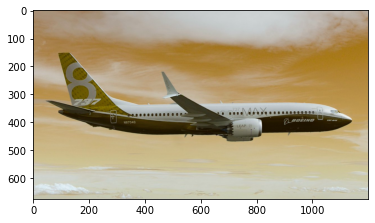

In [9]:
plt.imshow(src);

>Il est également possible de redimmensionner une image si elle n'est pas au format souhaitée. Pour cela, nous allons utiliser l'attribut **`.resize`** du module **`cv2`**.
>
* Dans un **`tuple`** nommé **`dsize`**, stockez les dimensions que vous souhaitez pour l'image. Ce **`tuple`** doit contenir deux éléments widht et height
* Appliquez l'attribut **`.resize`** à l'image **`src`** et stockez là dans **`output`**

In [ ]:
## Insérez votre code ici

In [ ]:
src = cv2.imread('avion2.jpg')
plt.imshow(src); # Affichage de l'image
# dsize
dsize = (10,100)

# redimensionnement de  l'image
output = cv2.resize(src, dsize)

>Comme evoqué précédemment, une image est vue et est interprtée par python comme un tableau **`numpy`** regoupant l'ensemble des pixels ainsi que leur intensité sur chaque plan de l'image.
>Pour apporter les modification du redimmensionnement de l'image à notre tableau, nous allons utiliser l'attribut **`.imwrite`** du module cv2 sur notre **`output`**.
> 
* Appliquez le changement de dimensions sur l'**`output`** puis affichez l'image


In [ ]:
## Insérez votre code ici

In [ ]:
cv2.imwrite('voiture.jpg',output) 
plt.imshow(src);

## Application

> Nous allons à présent travailler avec la base de données ***MNIST***. Cette base contient des images de chiffres manuscrits que nous tenterons de classifier suivant plusieurs méthodes de plus en plus poussées, en partant du simple ramdom Forest jusqu'à l'algorithme LeNet-5 développé spécifiquement pour cette base.
>
><img src="https://datascientest.fr/train/assets/lenet5.gif" style="height:250px">

## Contexte

> La base MNIST ("Modified National Institute of Standards and Technology") est une base de données de chiffres écrits à la main développée pour le problème de reconnaissance de chiffres manuscrits par trois chercheurs très réputés dans ce domaine: Yann LeCun, Corinna Cortes et Christopher Burges.
>
> Elle regroupe 70 000 images, issues d'une base de données antérieure, appelée NIST. 
> Ces images sont en échelle de gris, normalisées centrées et de taille 28x28 pixels.
> Les images sont données ici sous forme de vecteurs unidimensionnels de taille 784 (= 28 x 28).
>
>Plus de détails sur les données MNIST dans le lien suivant: [MNIST](http://yann.lecun.com/exdb/mnist/index.html).<br>
>Plus de détails sur le problème de reconnaissance de chiffres écrits à la main [ici](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf).

> Le module **`datasets`** de **keras** comprend un ensemble de sous module de jeu de données ([plus d'informations](https://keras.io/datasets/)). Pour charger un jeu de données de ses sous-modules, nous pouvons utiliser la fonction suivante :
```
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
```

* Charger le dataset **mnist** à l'aide de la fonction `load_data` du sous module **mnist**. Appeler l'échantillon d'entraînement **X_train** et **y_train**, et l'échantillon de validation **X_test** et **y_test**.

* Afficher la forme de **X_train** et **y_train**

In [ ]:
### Insérez votre code ici



In [ ]:
# Pour importer le datasets mnist de Keras
from keras.datasets.mnist import load_data

# Chargement des données MNIST
(X_train, y_train), (X_test, y_test) = load_data()

# Shape of X_train and y_train
print('Shape of X:', X_train.shape)
print('Shape of y:', y_train.shape)


> Pour afficher des graphiques sur une grille de figures, on utilise la fonction [**`subplot`**](http://matplotlib.org/api/pyplot_api.html?highlight=subplot#matplotlib.pyplot.subplot) de *matplotlib.pyplot*.
>
> Les images originales sont en niveau de gris. Lors de leur affichage, il faut préciser à la fonction [**`imshow`**](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.imshow) que l'on souhaite visualiser les pixels en nuance de gris, en choisissant la carte de couleur (**cmap**) correspondante . Ici, on choisira `cm.binary` parmi les *colormaps* de `matplotlib` que nous avons importées.



* Afficher, dans une grille de figures, 6 images tirées aléatoirement de l'échantillon **X_train**, avec en titre les labels correspondants de **y_train**. Pour chaque image il faudra :
    * Sélectionner son emplacement dans la grille de figures.
    * Afficher l'image en niveaux de gris en précisant la *colormap* **binary**.
    * Afficher le label correspondant à l'image dans le titre.
    
<div class='alert alert-success'>
<i class='fa fa-exclamation-circle'></i> &emsp;
Les labels des images sont contenus dans le vecteur y_train.
</div>

<div class='alert alert-warning'>
<i class='fa fa-exclamation-circle'></i> &emsp;
Ici, il est nécessaire de préciser le paramètre 'cmap = cm.binary' dans la fonction imshow afin d'afficher l'image en niveaux de gris sur fond blanc.
</div>

In [ ]:
### Insérez votre code ici



In [ ]:
j = 1

for i in np.random.choice(np.arange(0, len(y_train)), size = 6):
    # Image
    img = X_train[i] 
    
    # Subplot nous permet de selectionner une des sous-figures parmi une grille. Dans notre cas la grille
    # a 2 lignes et 3 colonnes.
    plt.subplot(2, 3, j)
    j = j + 1
    
    # Suppresion des axes
    plt.axis('off')
    
    # Affichage de la figure en niveaux de gris
    plt.imshow(img, cmap=cm.binary, interpolation='None')

    # Modification du titre de la figure
    plt.title('Label: ' + str(y_train[i]))

> Pour se donner une idée plus précise de la forme des différents chiffres écrits, il est possible de procéder à quelques statistiques basées sur les pixels des images.

* Pour chaque chiffre de 0 à 9, afficher **l'image moyenne** de l'échantillon X_train. Pour cela, pour chaque chiffre allant de 0 à 9, utiliser la méthode `mean` d'un *array* `numpy` pour calculer la moyenne de chaque pixel, en précisant '`axis = 0`' en paramètre de la méthode `mean` pour que la moyenne se fasse sur les images et non sur les lignes ou les colonnes.

<div class="alert alert-success">
<i class="fa fa-info-circle"></i> &emsp; 
Faire une boucle allant de 0 à 9 permettant de calculer l'image moyenne pour chaque chiffre séparément. À l'intérieur de la boucle, sélectionnez les images qui correspondent au bon label et calculez ensuite la moyenne. Enfin, affichez-la comme précédemment. 
</div>

In [ ]:
### Insérez votre code ici



In [ ]:
for i in range(10):
    # Selection des lignes de X_train correspondant au label i
    t = X_train[y_train == i]

    # Calcul de l'image moyenne
    img = t.mean(axis=0)
        
    # Affichage de l'image dans le i+1-ème emplacement d'une grille de figures
    # à 2 lignes et 5 colonnes.    
    plt.subplot(2, 5, i+1)
    plt.imshow(img, cmap=cm.binary, interpolation='None')

* Pour se donner une idée de la façon dont chaque chiffre varie dans son échantillon respectif, afficher pour chaque label entre 0 et 9 son **écart type** dans l'échantillon X_train , grâce à la méthode **`std`** d'un *array* `numpy`.

<div class="alert alert-success">
<i class="fa fa-info-circle"></i> &emsp; 
Il suffit de reprendre les mêmes étapes qu'à la question précédente, en remplaçant la méthode *mean* par la méthode *std*.
</div>

In [ ]:
### Insérez votre code ici



In [ ]:
for i in range(10):
    # Selection des lignes de X_train correspondant au label i
    t = X_train[y_train == i]

    # Calcul de l'image moyenne
    img = t.std(axis=0)
    
    # Affichage de l'image dans le i+1-ème emplacement d'une grille de figures
    # à 2 lignes et 5 colonnes.    
    plt.subplot(2, 5, i+1)
    plt.imshow(img, cmap=cm.binary, interpolation='None') 